In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from pathlib import Path
import pandas as pd

In [2]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 경로
train_dir = Path('./dataset/bt_train')
test_dir = Path('./dataset/bt_test')

=== 훈련 데이터셋 분석 ===


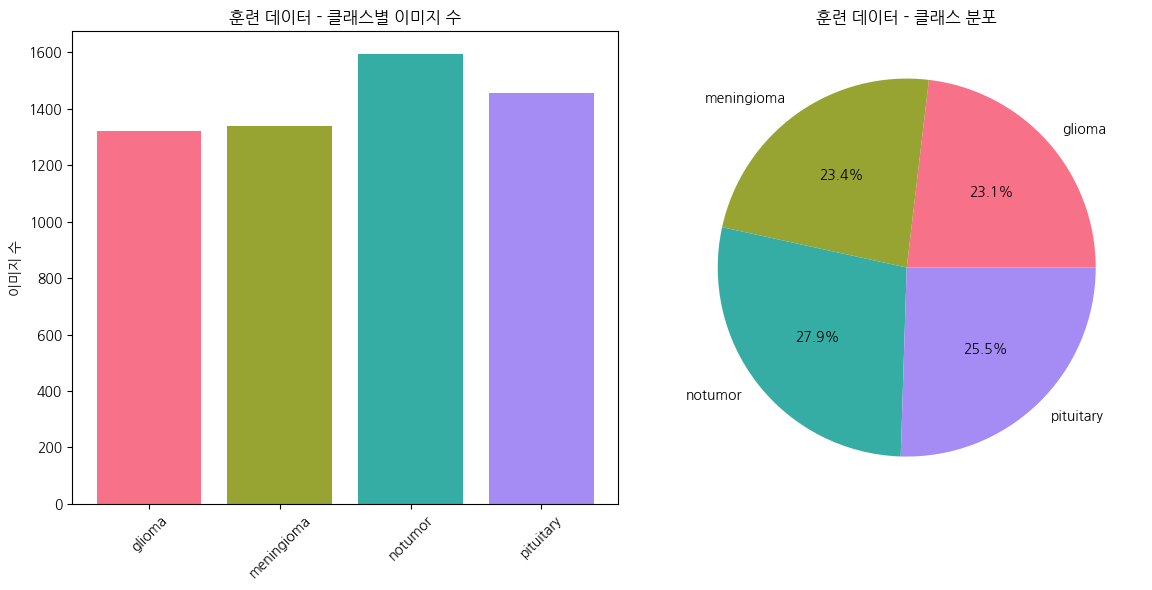

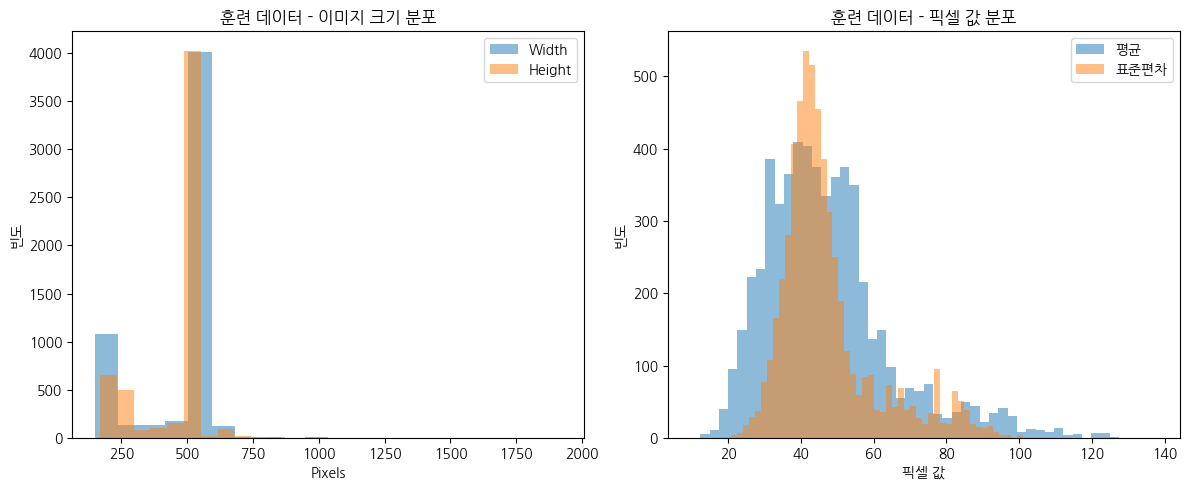


훈련 데이터 통계:
total_images: 5712
class_distribution: {'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}
avg_image_size: {'width': 451.563200280112, 'height': 453.8837535014006}
avg_pixel_mean: 47.30608118682715
avg_pixel_std: 47.31128398508226

=== 테스트 데이터셋 분석 ===


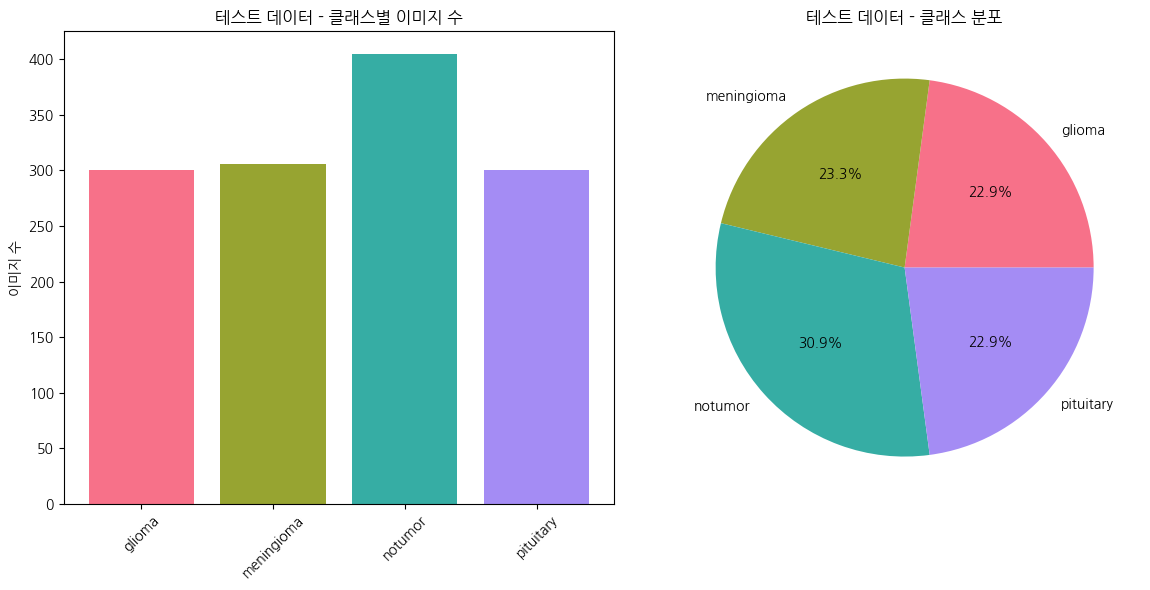

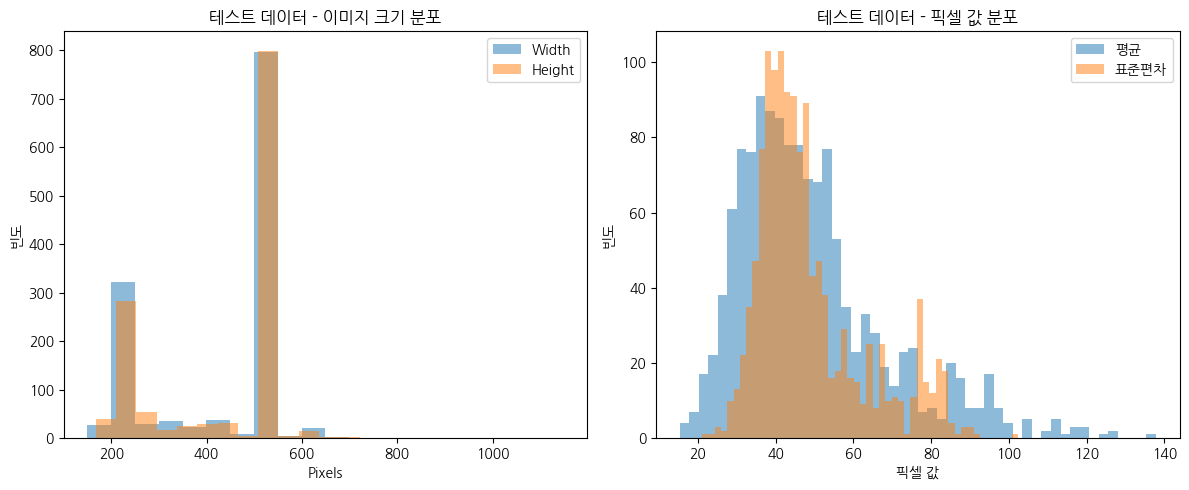


테스트 데이터 통계:
total_images: 1311
class_distribution: {'glioma': 300, 'meningioma': 306, 'notumor': 405, 'pituitary': 300}
avg_image_size: {'width': 421.1800152555301, 'height': 424.2227307398932}
avg_pixel_mean: 49.15009753711546
avg_pixel_std: 48.681946566599976

각 클래스 샘플 이미지:


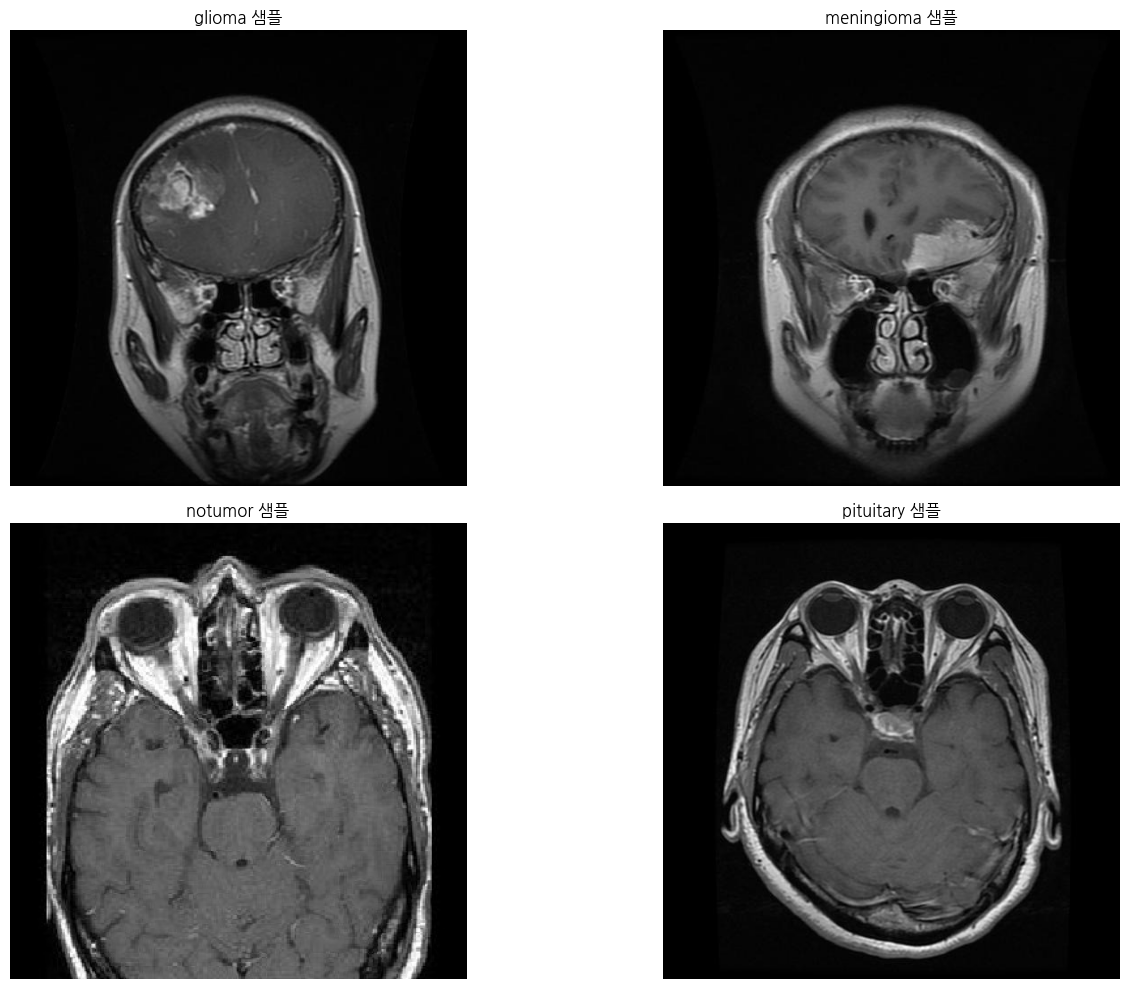

In [11]:
def analyze_dataset(data_dir, title):
    """데이터셋 분석 및 시각화 함수"""
    # 클래스별 이미지 수 계산
    classes = sorted([item.name for item in data_dir.glob('*/') if item.is_dir()])
    class_counts = []
    image_sizes = []
    pixel_means = []
    pixel_stds = []
    
    for class_name in classes:
        # 이미지 수 계산
        images = list(data_dir.glob(f'{class_name}/*.jpg'))
        class_counts.append(len(images))
        
        # 이미지 특성 분석
        for img_path in images:
            img = Image.open(img_path)
            img_array = np.array(img)
            image_sizes.append(img.size)
            pixel_means.append(img_array.mean())
            pixel_stds.append(img_array.std())
    
    # 1. 클래스 분포 시각화
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    colors = sns.color_palette('husl', n_colors=len(classes))
    plt.bar(classes, class_counts, color=colors)
    plt.title(f'{title} - 클래스별 이미지 수')
    plt.xticks(rotation=45)
    plt.ylabel('이미지 수')
    
    # 파이 차트로도 표시
    plt.subplot(1, 2, 2)
    plt.pie(class_counts, labels=classes, colors=colors, autopct='%1.1f%%')
    plt.title(f'{title} - 클래스 분포')
    plt.tight_layout()
    plt.show()
    
    # 2. 이미지 크기 분포
    sizes_df = pd.DataFrame(image_sizes, columns=['width', 'height'])
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(sizes_df['width'], bins=20, alpha=0.5, label='Width')
    plt.hist(sizes_df['height'], bins=20, alpha=0.5, label='Height')
    plt.xlabel('Pixels')
    plt.ylabel('빈도')
    plt.title(f'{title} - 이미지 크기 분포')
    plt.legend()
    
    # 3. 픽셀 값 분포
    plt.subplot(1, 2, 2)
    plt.hist(pixel_means, bins=50, alpha=0.5, label='평균')
    plt.hist(pixel_stds, bins=50, alpha=0.5, label='표준편차')
    plt.xlabel('픽셀 값')
    plt.ylabel('빈도')
    plt.title(f'{title} - 픽셀 값 분포')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # 통계 정보 반환
    stats = {
        'total_images': sum(class_counts),
        'class_distribution': dict(zip(classes, class_counts)),
        'avg_image_size': sizes_df.mean().to_dict(),
        'avg_pixel_mean': np.mean(pixel_means),
        'avg_pixel_std': np.mean(pixel_stds)
    }
    return stats

# 훈련 데이터 분석
print("=== 훈련 데이터셋 분석 ===")
train_stats = analyze_dataset(train_dir, "훈련 데이터")
print("\n훈련 데이터 통계:")
for key, value in train_stats.items():
    print(f"{key}: {value}")

print("\n=== 테스트 데이터셋 분석 ===")
test_stats = analyze_dataset(test_dir, "테스트 데이터")
print("\n테스트 데이터 통계:")
for key, value in test_stats.items():
    print(f"{key}: {value}")

# 샘플 이미지 시각화
def show_sample_images():
    plt.figure(figsize=(15, 10))
    classes = sorted([item.name for item in train_dir.glob('*/') if item.is_dir()])
    
    for idx, class_name in enumerate(classes):
        # 각 클래스에서 첫 번째 이미지 가져오기
        img_path = next(train_dir.glob(f'{class_name}/*.jpg'))
        img = Image.open(img_path)
        
        plt.subplot(2, 2, idx + 1)
        plt.imshow(img)
        plt.title(f'{class_name} 샘플')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

print("\n각 클래스 샘플 이미지:")
show_sample_images()